In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding Data
- A total of 4 datasets are provided
- "companies" dataset gives concise information of the companies which have received investments along with the categories each company belongs to
- "rounds2" dataset gives the detailed portfolio of investments that each company received
- "mapping" dataset provides a mapping of each category to a main sector
- "countries" pdf that has a list of English speaking countries

# Objectives of Data Analysis
- Identifying best sectors, countries and a suitable investment type for __Spark Funds__
- Underlying observation is that Spark Funds want to invest in sectors and countries that a lot of other investors are investing - based upon their strategy.
- Spark Funds want to invest anywhere between __ 5 to 15 million USD__
- Spark Funds want to invest only in English speaking countries - because of the ease of communication

# Data Analysis Strategy:
- Load companies and rounds2 datasets
- Observe
- Clean dataframes
- Merge companies and rounds2 dataframes, if necessary, to give a master_frame for further analysis

### Load companies and rounds2 datasets
- Observe that companies csv dataset has 'tab' delimiter
- Observe that rounds2 csv dataset has ',' delimiter and 'ISO-8859-1' encoding

In [2]:
# Load companies data - with 'tab' delimiter
companies = pd.read_csv('./companies.csv', sep='\t')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
# Load rouds data - with default (,) delimiter and ISO encoding
rounds2 = pd.read_csv('./rounds2.csv', encoding = 'ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Observations:
- In companies dataframe, we can use "permalink" column as a unique key for each company
- In rounds2 dataframe, we can use "funding_round_permalink" column as a unique key for each round of investment

## Cleaning Data
- Companies:
    - Convert all strings to lower case for maintaining uniformity
    - Identify if there are any missing values
- Rounds2:
    - Convert all strings to lower case for maintaining uniformity
    - Identify if there are any missing values

In [4]:
# Convert all strings to lower case in companies dataframe
companies = companies.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010


In [5]:
# Check if there are any missing values in 'companies' dataframe
companies.isnull().any()

permalink        False
name             False
homepage_url      True
category_list     True
status            True
country_code      True
state_code        True
region            True
city              True
founded_at        True
dtype: bool

In [6]:
# Convert all strings to lower case in "rounds2" dataframe
rounds2 = rounds2.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0


In [7]:
# Check if there are any missing values in 'rounds2' dataframe
rounds2.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
dtype: bool

In [8]:
# Get the no. of unique companies in 'companies' dataframe
# Since permalink is unique for each company, we are using 'permalink' column to identify a unique company.
companies.permalink.nunique(dropna = True)

29489

In [9]:
# Get no. of unique companies in 'rounds2' dataframe
# Since 'company_permalink' is unique for each company, we are using 'company_permalink' to identify a unique company.
rounds2.company_permalink.nunique(dropna = True)

66370

### Observations:
- Both companies and rounds2 dataframes have missing values
- No. of unique records in companies dataframe = 29489
- No. of unique records in rounds2 dataframe = 66370

<br>
__There are many companies in rounds2 dataframe that are not present in companies dataframe. And, both of them have missing values__

# Cleaning and Manipulating Data
- Merge companies and rounds2 dataframes
- Identify null/empty values and impute/treat them
- Iterate above steps, if necessary
- Extract 'Primary Sector' of operation for each company

## Merge
- Since we need complete details of a company along with its investments, merge rounds2 and companies dataframe for further analysis
- This will also remove all the unnecessary investments information of companies that are not present in "companies" dataframe from rounds2 dataframe

In [10]:
# Merging companies with rounds
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007


In [11]:
# No. of rows in master_frame
len(master_frame)

50990

In [12]:
# master_frame info
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50990 entries, 0 to 50989
Data columns (total 16 columns):
company_permalink          50990 non-null object
funding_round_permalink    50990 non-null object
funding_round_type         50990 non-null object
funding_round_code         13881 non-null object
funded_at                  50990 non-null object
raised_amount_usd          42264 non-null float64
permalink                  50990 non-null object
name                       50990 non-null object
homepage_url               48238 non-null object
category_list              49475 non-null object
status                     50989 non-null object
country_code               47300 non-null object
state_code                 46258 non-null object
region                     46607 non-null object
city                       46607 non-null object
founded_at                 41784 non-null object
dtypes: float64(1), object(15)
memory usage: 6.6+ MB


- Observe that there are missing values in many columns

In [13]:
# Describe master_frame
master_frame.describe()

,raised_amount_usd
count,4.226400e+04
mean,1.079353e+07
std,1.176646e+08
min,0.000000e+00
25%,3.500000e+05
50%,1.800000e+06
75%,7.019667e+06
max,1.760000e+10


In [14]:
# Identify columns having missing values
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                       False
homepage_url                True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [15]:
# Calculate the total no. of missing values in each column
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         37109
funded_at                      0
raised_amount_usd           8726
permalink                      0
name                           0
homepage_url                2752
category_list               1515
status                         1
country_code                3690
state_code                  4732
region                      4383
city                        4383
founded_at                  9206
dtype: int64

In [16]:
# Check if there are any rows with all of the values missing
master_frame.isnull().all(axis=1).sum()

0

- Observe that there are no rows that has missing values in all columns

In [17]:
# Calculate the percentage of missing values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.78
funded_at                   0.00
raised_amount_usd          17.11
permalink                   0.00
name                        0.00
homepage_url                5.40
category_list               2.97
status                      0.00
country_code                7.24
state_code                  9.28
region                      8.60
city                        8.60
founded_at                 18.05
dtype: float64

In [18]:
# Remove columns that has > 50% of missing values.
# We have funding_round_code column that falls into the above category
master_frame = master_frame.drop('funding_round_code', axis=1)

In [19]:
# Since our goal is to calculate the average funding amount in each category and identify the category that best suits Spark Funds,
# Remove all rows that has NaN in raised_amount_usd
master_frame = master_frame[-np.isnan(master_frame['raised_amount_usd'])]

In [20]:
len(master_frame)

42264

In [21]:
# We don't need homepage_url. Hence, removing it
master_frame = master_frame.drop('homepage_url', axis=1)

In [22]:
# Since Spark Funds is interested to invest ONLY in English speaking countries, we can remove the rows that doesn't have country_code
master_frame = master_frame[-pd.isnull(master_frame['country_code'])]

In [23]:
# Since Spark Funds is interested to invest in best sectors, remove all entries without a category
master_frame = master_frame[-pd.isnull(master_frame['category_list'])]

In [24]:
# Since we are interested only at the country level, either leave region, city, state_code with NaN or remove those columns entirely
# Similarly for founded_at column, since we don't need it, either leave it or remove completely
# Since state_code, region, city and founded_at columns are not useful for our analysis, removing them
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [25]:
# Check if there are any missing values in master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [26]:
# New length of master_frame
len(master_frame)

39496

### Observations:
- There are no rows that has missing values in all of their columns
- Since our analysis is dependent on 'raised_amount_usd', removed all rows that has missing value in this column
- Since our analysis is dependent on 'English speaking countries', removed all rows that has missing value in 'country_code' column
- Since we should identify the main sector to invest, removed all rows that has missing value in 'category_list' column.
- Since we don't need funding_round_code, homepage_url, state_code, region, city and founded_at columns and since they contain missing values, I have imputed those columns completely instead of treating them

<br>
__No. of rows in master_frame after data manipulation = 39496__

# Data Analysis
- Identify the average amount of investments in each fund type from venture, angel, seed, private equity funds
- Choose the appropriate fund type (FT) for Spark Funds to invest - considering the fact that they want to invest between 5 to 15 million USD
- Filter master_frame to contain only FT related data
- Identify top 3 'English Speaking Countries' where investments of FT are higher
- Add a new column 'primary_sector' extracted from 'category_list' for each country
- Load mapping dataset that contains 'main_sector' for each 'primary_sector'
- Check if there are any missing values in mapping dataframe
- In mapping dataframe, check if any primary_sector is mapped to multiple main_sector
- Manipulate data in 'mapping' dataframe
- Merge master_frame and mapping dataframes so that we will have both primary_sector and main_sector in a single dataframe
- Perform a Sector-wise Analysis

In [27]:
# Get average amount of investments in each fund type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().nlargest(15).astype(int)

funding_round_type
post_ipo_debt            137356226
post_ipo_equity           83393528
private_equity            77007387
secondary_market          54657835
undisclosed               15721240
debt_financing            12957519
venture                   11913529
grant                      4440225
product_crowdfunding       1418404
convertible_note           1288431
non_equity_assistance       905035
angel                       861799
seed                        762406
equity_crowdfunding         635760
Name: raised_amount_usd, dtype: int64

In [28]:
# Constructing below data for plotting plots at the end
# For fraction of total investments in venture, seed and private_equity
total_investment = sum(master_frame['raised_amount_usd'])
total_investment_venture = sum(master_frame[master_frame['funding_round_type'] == 'venture']['raised_amount_usd'])
total_investment_seed = sum(master_frame[master_frame['funding_round_type'] == 'seed']['raised_amount_usd'])
total_investment_private_equity = sum(master_frame[master_frame['funding_round_type'] == 'private_equity']['raised_amount_usd'])

In [29]:
# Constructing below data for plotting plots at the end
# Avg. amount of investment in each funding type
avg_investment_venture = round(np.mean(master_frame[master_frame['funding_round_type'] == 'venture']['raised_amount_usd']))
avg_investment_seed = round(np.mean(master_frame[master_frame['funding_round_type'] == 'seed']['raised_amount_usd']))
avg_investment_private_equity = round(np.mean(master_frame[master_frame['funding_round_type'] == 'private_equity']['raised_amount_usd']))

### Observations:
- Average amount of funding in private_equity fund type = 77007387
- Average amount of funding in venture fund type = 11913529
- Average amount of funding in angel fund type = 861799
- Average amount of funding in seed fund type = 762406

Though the average funding in private_equity is higher among others, considering the fact that Spark Funds want to invest only between 5 to 15 million USD, __Venture Fund__ is the only fund type that their investment interests might fit in

__Fund Type suitable for Spark Funds to invest their 5 to 15 million USD: Venture Fund__

In [30]:
# Include only Venture Fund Type in master_frame for further analysis
master_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,ind
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,curated web,operating,chn
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,h2o.ai,analytics,operating,usa
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,h2o.ai,analytics,operating,usa


In [31]:
# Get the list of top 9 countries that received highest venture funding across all sectors
top9 = master_frame.groupby('country_code')['raised_amount_usd'].sum().nlargest(9).astype(int)
top9

country_code
usa    196016174085
chn     16392359917
gbr      7979489995
ind      7907685603
can      4248486960
deu      3654157482
fra      3275628447
isr      3143878326
sgp      1957069910
Name: raised_amount_usd, dtype: int64

### Observations:
- Spark Funds want to invest their money only in English speaking countries
- From the above list of Top 9 countries that received highest Venture Funding investment, though China received second highest venture funding investment, it is not appropriate for Spark Funds investment as they want to invest only in English speaking countries
- Refer to "countries" dataset for identifying English speaking countries based upon country code in master_frame

__Top 3 English speaking countries that received highest investments in Venture Funds are: United States, United Kingdom and India__

In [32]:
# Creating below dataframe for plotting a graph
# Top 9 countries Venture Funding
top9_df = master_frame.groupby('country_code', as_index=False)['raised_amount_usd'].sum()
top9_df = top9_df.sort_values(by='raised_amount_usd', ascending=False).head(9)
top9_df['raised_amount_usd'] = top9_df['raised_amount_usd'].apply(lambda x: round(x/10000000, 2))

In [33]:
# Set master_frame to show only entries related to usa/gbr/ind country_code
master_frame = master_frame.loc[master_frame['country_code'].isin(['usa', 'gbr', 'ind'])]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,ind
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,h2o.ai,analytics,operating,usa
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,h2o.ai,analytics,operating,usa
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,h2o.ai,analytics,operating,usa
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 mainstream,apps|cable|distribution|software,acquired,usa


In [34]:
# No. of rows in master_frame after above manipulation
len(master_frame)

17652

In [35]:
# Extract Primary Sector from category_list for each company and add it to a new column primary_sector
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0] if (len(x.split('|')) > 0) else x)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,ind,media
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,h2o.ai,analytics,operating,usa,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 mainstream,apps|cable|distribution|software,acquired,usa,apps


In [36]:
# Check if master_frame['primary_sector'] has any nulls
master_frame.primary_sector.isnull().any()

False

In [37]:
# Check if master_frame['primary_sector'] has any empty values
master_frame.empty

False

In [38]:
# Load mapping.csv
mapping = pd.read_csv('./mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [39]:
# Check if there are any nulls
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [40]:
# Since none of the primary_sectory column values is null or empty, remove NaN from mapping
mapping.drop(mapping.index[0], inplace=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [41]:
# Check if there are any nulls
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [42]:
# Check if each category has only 1 main category
mapping['sum_of_all_col_counts'] = mapping.sum(axis=1)

In [43]:
# Get the category that has more than 1 main sector
mapping.loc[mapping['sum_of_all_col_counts'] > 1]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",sum_of_all_col_counts


### Observations:
- mapping dataset contains the information of main_sector for each primary_sector
- There is an empty primary_sector that is mapped to 'Blanks' main_sector
- Since, we don't have any primary_sector that is empty in master_frame, I imputed empty primary_sector row from mapping dataframe instead of treating
- __None of the primary_sector is mapped to multiple main_sector__

Reshaping mapping dataframe to include main_sector against each primary_sector

In [44]:
# Melt 'mapping' df to reshape
melted_mapping = pd.melt(mapping, id_vars=['category_list'], var_name='main_sector', value_name='score')
melted_mapping.head()

,category_list,main_sector,score
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [45]:
# Convert all category_list of mapping to lower case like we did for master_frame
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.lower())

### Data Cleaning:
- Observe that there is '0' as a character in few categories in mapping dataframe
- Replacing '0' with 'na'
- Adding 'main_sector' as a column against each primary_sector

In [46]:
mapping['category_list'].str.contains('0').sum()

53

In [47]:
# Replace 0 in category with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))

In [48]:
# Function to get main_sector for a given category
def getMainSectorForCategory(category):
    all_main_sectors = melted_mapping[melted_mapping['category_list'].str.lower() == category.lower()]
    main_sector = all_main_sectors[all_main_sectors['score'] == 1]['main_sector']
    for i, v in main_sector.items():
        return v

In [49]:
# Ex
getMainSectorForCategory('aerospace')

'Automotive & Sports'

In [50]:
# Add main_sector as a column to mapping dataframe
mapping['main_sector'] = mapping['category_list'].apply(lambda x: getMainSectorForCategory(x))
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",sum_of_all_col_counts,main_sector
1,3d,0,0,0,0,0,1,0,0,0,1,Manufacturing
2,3d printing,0,0,0,0,0,1,0,0,0,1,Manufacturing
3,3d technology,0,0,0,0,0,1,0,0,0,1,Manufacturing
4,accounting,0,0,0,0,0,0,0,0,1,1,"Social, Finance, Analytics, Advertising"
5,active lifestyle,0,0,0,0,1,0,0,0,0,1,Health


Merge master_frame and mapping to get main_sector for each primary_sector for further analysis

In [51]:
# Length of master_frame before merge
len(master_frame)

17652

In [52]:
# Merge master_frame and mapping via category_list
master_frame = pd.merge(master_frame, mapping, how='inner', left_on='primary_sector', right_on='category_list')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,...,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",sum_of_all_col_counts,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,ind,...,0,0,1,0,0,0,0,0,1,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,gbr,...,0,0,1,0,0,0,0,0,1,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,gbr,...,0,0,1,0,0,0,0,0,1,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,gbr,...,0,0,1,0,0,0,0,0,1,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,media,operating,usa,...,0,0,1,0,0,0,0,0,1,Entertainment


In [53]:
# Length of master_frame after merging
len(master_frame)

17644

### Observations:
- After merging master_frame with mapping table, 8 rows went missing. This happened because mapping dataframe didn't have have values for 8 primary_sector values that are present in master_frame
- Since the no. of rows that went off are less when compared to total no. of rows, ignoring it.

### Preparing dataframes for top 3 countries
- D1 for USA
- D2 for UK
- D3 for India

Use above dataframes for further sector-wise analysis

In [54]:
# df for USA
D1 = master_frame[master_frame['country_code'] == 'usa']
print(len(D1))
print(D1.raised_amount_usd.sum())

16374
195788923782.0


In [55]:
# Total no. of investments for each main sector for USA
D1.groupby('main_sector')['country_code'].count().nlargest(15)

main_sector
Cleantech / Semiconductors                 3933
Others                                     3766
Social, Finance, Analytics, Advertising    2224
News, Search and Messaging                 1821
Health                                     1457
Manufacturing                              1086
Entertainment                               747
Automotive & Sports                         220
Name: country_code, dtype: int64

In [56]:
# Total amount invested in each main sector for USA
D1.groupby('main_sector')['raised_amount_usd'].sum().astype(int)

main_sector
Automotive & Sports                         2372191199
Cleantech / Semiconductors                 65985159389
Entertainment                               7676801343
Health                                     14842963541
Manufacturing                              10180366392
News, Search and Messaging                 19774217333
Others                                     35152829793
Social, Finance, Analytics, Advertising    25650254817
Name: raised_amount_usd, dtype: int64

In [57]:
# Company that received highest investment in Top Sector in USA
D1_groupby = D1[D1['main_sector'] == 'Cleantech / Semiconductors'].groupby('company_permalink')[['raised_amount_usd', 'name']].sum().astype(int)
D1_groupby.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
company_permalink,
/organization/freescale,17600000000
/organization/better-place,775000000
/organization/brightsource-energy,582000000


In [58]:
# Company that received highest investment in Top Second Sector in USA
D1_groupby = D1[D1['main_sector'] == 'Others'].groupby('company_permalink')[['raised_amount_usd', 'name']].sum().astype(int)
D1_groupby.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
company_permalink,
/organization/facebook,615200000
/organization/coreexpress,573000000
/organization/carsdirect-com,280000000


### Sector-wise observation for USA:
- Total no. of investments across all sectors = 16374
- Total amount of investment across all sectors = 195788923782
- Top sector (based on count of investments) = Cleantech / Semiconductors
- Second-best sector (based on count of investments) = Others
- Third-best sector (based on count of investments) = Social, Finance, Analytics, Advertising
- Number of investments in the top sector (refer to point 3) = 3933
- Number of investments in the second-best sector (refer to point 4) = 3766
- Number of investments in the third-best sector (refer to point 5) = 2224
- For the top sector count-wise (point 3), which company received the highest investment? = freescale semiconductor
- For the second-best sector count-wise (point 4), which company received the highest investment? = facebook

In [59]:
# df for United Kingdom
D2 = master_frame[master_frame['country_code'] == 'gbr']
print(len(D2))
print(D2.raised_amount_usd.sum())

902
7910920761.0


In [60]:
# Total amount invested in each main sector for UK
D2.groupby('main_sector')['raised_amount_usd'].sum().astype(int)

main_sector
Automotive & Sports                         302238155
Cleantech / Semiconductors                 2803748076
Entertainment                               251045383
Health                                      266868156
Manufacturing                               454911683
News, Search and Messaging                  801999611
Others                                     1626976774
Social, Finance, Analytics, Advertising     701682991
Name: raised_amount_usd, dtype: int64

In [61]:
# Total no. of investments for each main sector for UK
D2.groupby('main_sector')['country_code'].count().nlargest(15)

main_sector
Others                                     239
Cleantech / Semiconductors                 221
Social, Finance, Analytics, Advertising    130
News, Search and Messaging                  87
Manufacturing                               47
Health                                      46
Entertainment                               39
Automotive & Sports                         24
Name: country_code, dtype: int64

In [62]:
# Company that received highest investment in Top Sector in UK
D2_groupby = D2[D2['main_sector'] == 'Others'].groupby('company_permalink')[['raised_amount_usd', 'name']].sum().astype(int)
D2_groupby.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
company_permalink,
/organization/farfetch,194500000
/organization/barrett-xplore,65000000
/organization/cambridge-broadband-networks,55500000


In [63]:
# Company that received highest investment in Top Second Sector in UK
D2_groupby = D2[D2['main_sector'] == 'Cleantech / Semiconductors'].groupby('company_permalink')[['raised_amount_usd', 'name']].sum().astype(int)
D2_groupby.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
company_permalink,
/organization/immunocore,320000000
/organization/circassia,144630999
/organization/biovex,133314585


### Sector-wise observation for UK:
- Total no. of investments across all sectors = 902
- Total amount of investment across all sectors = 7910920761
- Top sector (based on count of investments) = Others
- Second-best sector (based on count of investments) = Cleantech / Semiconductors
- Third-best sector (based on count of investments) = Social, Finance, Analytics, Advertising
- Number of investments in the top sector (refer to point 3) = 239
- Number of investments in the second-best sector (refer to point 4) = 221
- Number of investments in the third-best sector (refer to point 5) = 130
- For the top sector count-wise (point 3), which company received the highest investment? = farfetch
- For the second-best sector count-wise (point 4), which company received the highest investment? = immunocore

In [64]:
# df for India
D3 = master_frame[master_frame['country_code'] == 'ind']
print(len(D3))
print(D3.raised_amount_usd.sum())

368
7907685603.0


In [65]:
# Total amount invested in each main sector for India
D3.groupby('main_sector')['raised_amount_usd'].sum().astype(int)

main_sector
Automotive & Sports                        1342450000
Cleantech / Semiconductors                  339267633
Entertainment                               426355049
Health                                      124560000
Manufacturing                               368410000
News, Search and Messaging                  598026000
Others                                     4120290938
Social, Finance, Analytics, Advertising     247188500
Name: raised_amount_usd, dtype: int64

In [66]:
# Total no. of investments for each main sector for India
D3.groupby('main_sector')['country_code'].count().nlargest(15)

main_sector
Others                                     138
News, Search and Messaging                  46
Entertainment                               33
Social, Finance, Analytics, Advertising     30
Manufacturing                               26
Cleantech / Semiconductors                  23
Automotive & Sports                         17
Health                                      16
Name: country_code, dtype: int64

In [67]:
# Company that received highest investment in Top Sector in India
D3_groupby = D3[D3['main_sector'] == 'Others'].groupby('company_permalink')[['raised_amount_usd', 'name']].sum().astype(int)
D3_groupby.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
company_permalink,
/organization/flipkart,2451000000
/organization/delhivery,127500000
/organization/igate-patni-computers,100000000


In [68]:
# Company that received highest investment in Top Second Sector in India
D3_groupby = D3[D3['main_sector'] == 'News, Search and Messaging'].groupby('company_permalink')[['raised_amount_usd', 'name']].sum().astype(int)
D3_groupby.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
company_permalink,
/organization/freecharge,113000000
/organization/hike,86000000
/organization/indiahomes,75776000


### Sector-wise observation for India:
- Total no. of investments across all sectors = 368
- Total amount of investment across all sectors = 7907685603
- Top sector (based on count of investments) = Others
- Second-best sector (based on count of investments) = News, Search and Messaging
- Third-best sector (based on count of investments) = Entertainment
- Number of investments in the top sector (refer to point 3) = 138
- Number of investments in the second-best sector (refer to point 4) = 46
- Number of investments in the third-best sector (refer to point 5) = 33
- For the top sector count-wise (point 3), which company received the highest investment? = flipkart
- For the second-best sector count-wise (point 4), which company received the highest investment? = freecharge

# Plots
- Plot 1 - A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type
- Plot 2 - A plot showing the top 9 countries against the total amount of investments of funding type FT
- Plot 3 - A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

### Plot 1

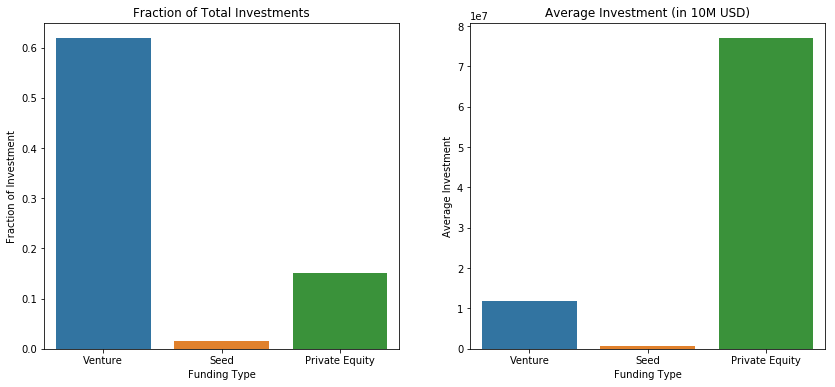

In [69]:
# Plot 1
plt.figure(figsize=(14, 6))

# Subplot 1: Fraction of total investments in venture, seed and private_equity
plt.subplot(1, 2, 1)
plt.title('Fraction of Total Investments')
fraction_df = pd.DataFrame({
    'Funding Type': ['Venture', 'Seed', 'Private Equity'],
    'Fraction of Investment': [total_investment_venture/total_investment, total_investment_seed/total_investment, total_investment_private_equity/total_investment]
})
sns.barplot(x='Funding Type', y='Fraction of Investment', data=fraction_df)

# Subplot 2: Average amount of investment in each funding type
plt.subplot(1, 2, 2)
plt.title('Average Investment (in 10M USD)')
average_df = pd.DataFrame({
    'Funding Type': ['Venture', 'Seed', 'Private Equity'],
    'Average Investment': [avg_investment_venture, avg_investment_seed, avg_investment_private_equity]
})
sns.barplot(x='Funding Type', y='Average Investment', data=average_df)
plt.show()

### Observations:
- From the plots above, it is evident that more than 60% of investments are made in Venture Funds
- It is also evident that the average amount invested in Venture Fund is around 11 million USD and falls in the investment portfolio of Spark Funds - which plans to invest between 5 to 15 million USD

### Plot 2

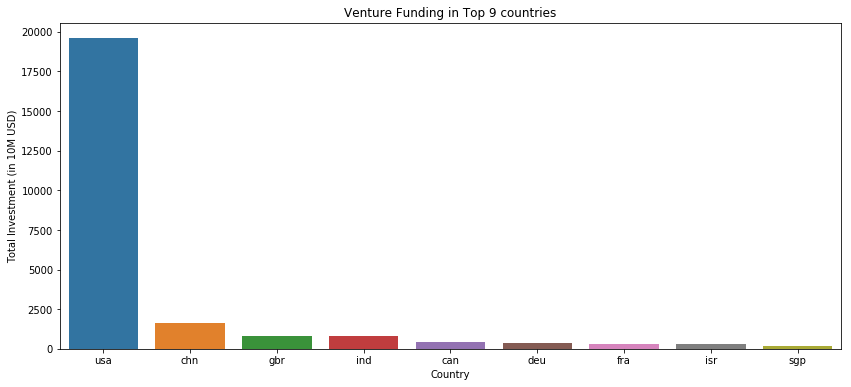

In [70]:
# Plot top 9 countries that received investments in Venture Funding

plt.figure(figsize=(14, 6))

plt.title('Venture Funding in Top 9 countries')
sns.barplot(x='country_code', y='raised_amount_usd', data=top9_df)
plt.xlabel('Country')
plt.ylabel('Total Investment (in 10M USD)')
plt.show()

### Observations:
- From above plot, it is clear that USA attracts most no. of investments in Venture Funds - followed by China, United Kingdom and India.
- Since Spark Funds is interested to invest only in countries where English is official language, we can remove China from the top list.
- Hence, the top 3 countries are USA, United Kingdom and India

### Plot 3

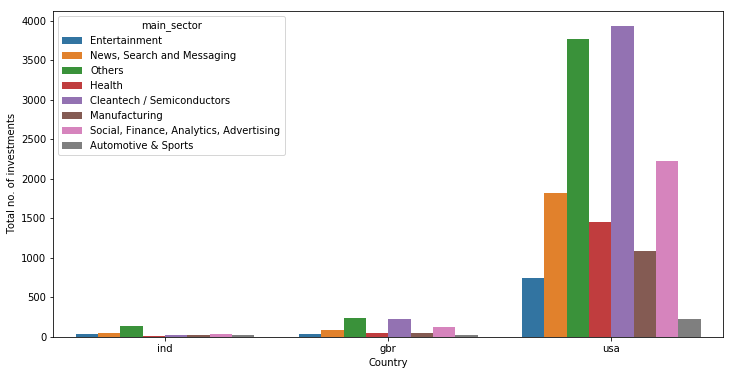

In [71]:
# Plot the number of investments in the top 3 sectors of the top 3 countries on one chart
plt.figure(figsize=(12,6))
sns.countplot(data=master_frame, x='country_code', hue='main_sector')
plt.xlabel('Country')
plt.ylabel('Total no. of investments')
plt.show()

### Observations:
- It is evident from the above plot that "Cleantech/Semiconductors" sector from USA is attracting the most no. of investments
- __Hence, Spark Funds can safely invest in "Cleantech/Semiconductors" sector from USA as a Venture Fund__